In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

## Estadística Inferencial

En muchos casos describir los datos y graficarlos puede ser suficiente para nuestros propósitos. Pero en otros casos esto es solo el primer paso de un análisis que intenta no solo describir los datos si no comprender los procesos o mecanismos que dieron origen a los datos observados. Esto se conoce como estadística inferencial, es una forma de modelado y será el tema central de los próximos capítulos. 

Los modelos son una descripción, simplificada, de un sistema bajo estudio y no solo una descripción de los datos. Los modelos se construyen intentando capturar lo mejor posible la información relevante, por lo que un modelo más complejo no necesariamente es mejor que uno simple. Decenas, cientos o miles de datos pueden pasar a ser descriptos por unos pocos parámetros que definen al modelo (en cierto modo estamos comprimiendo información).

* Los modelos, al ser más simple que el fenómeno estudiado, permiten pensar el problema con mayor claridad.
* Crear un modelo implica pensar acerca del problema y evaluar cuales son los factores que se consideran más relevantes y cuales pueden ser despreciados. 
* Los modelos estadísticos (como otros modelos formales) pueden ser estudiados analíticamente y/o numéricamente lo que puede contribuir enormemente a comprender el fenómeno subyacente a los datos.

Dentro de la estadística Inferencial se suelen distinguir dos grande paradigmas:

* El paradigma Frecuentista (tema de este capítulo)
* El paradigma Bayesiano

En los últimos años se ha desarrollado, además, un conjunto de técnicas agrupadas bajo el rotulo de _machine learning_. El _machine learning_ es algo así como una re-invención de la estadística por parte de informáticos más preocupados en resolver problemas que en demostrar teoremas.

Una de las diferencias, algo caricaturizada, entre la estadística inferencial y el _machine learning_ es el énfasis en el modelo. En _machine learning_ se usan modelos que en general son de caja negra es decir los parámetros del modelo no son de interés principal, lo importante es predecir. En cambio la estadística inferencial pone énfasis en entender los parámetros del modelo como medio para entender el problema y eventualmente predecir el comportamiento del sistema. Esta linea que separa ambas aproximaciones se está tornando cada vez más difusa, el flujo de ideas entre estas dos disciplinas (que por mucho tiempo se desarrollaron en paralelo), es cada vez mayor. Los métodos de _Machine Leanring_ usan muchas ideas de la estadística. Además es cada vez más grande el interés por parte de la comunidad de _Machine Learning_ en desarrollar métodos Bayesianos. En el fondo estas tres grandes grandes ramas de la inferencia tienen un mismo sustento teórico que es la teoría de probabilidad.

### ¿Por qué es necesario inferir?

Un modelo mental muy útil en estadística consiste en considerar que existe una población que es es el conjunto de objetos/variables que me interesan. En general la población no es algo a lo que tengamos acceso directo, con suerte solo tenemos acceso a un subconjunto de esa población al que llamamos _muestra_ (otros nombres posibles son datos, dataset, observaciones, "data").

El proceso de inferencia consiste en poder estimar propiedades de la población a partir de la muestra. Una forma de inferencia consiste en asumir que la población viene dada por una distribución de probabilidad (o combinación de distribuciones), por ejemplo una gaussiana. Si asumimos que la población es Gaussiana entonces el proceso de inferencia consistirá en determinar los dos parámetros que definen a esta distribución, la media y su desviación estándar. Esta forma de inferencia se llama paramétrica, ya que consiste en definir primero una serie de parámetros y luego tratar de obtener los parámetros que mejor expliquen los datos. Existe otra forma llamada no-paramétrica, un ejemplo de un método no paramétrico lo vimos al emplear el kernel density estimation (kde) para hacer gráficos.

## Métodos frecuentistas

Al analizar datos, se puede pensar en dos grandes alternativas:

* Pruebas de hipótesis
* Estimación del tamaño de un efecto junto con la determinación de la incertidumbre

Ambas aproximaciones pueden encararse desde una posición frecuentista o Bayesiana. En este capítulo veremos la forma frecuentista.

Dentro del paradigma frecuentista la primera de estas estrategias es la que tradicionalmente se ha enseñado y divulgado con más énfasis. Mientras que la segunda viene ganando adeptos y se la ha llamado "[nueva estadística](https://www.amazon.com/Understanding-New-Statistics-Meta-Analysis-Multivariate/dp/041587968X)" (aunque las ideas disten bastante de ser realmente nuevas).

Empecemos viendo las pruebas de hipótesis.

### Prueba de hipótesis

La prueba de hipótesis,también llamada test de hipótesis o prueba de significación, es un procedimiento para establecer si una propiedad dada de una población es compatible con lo observado en una muestra de dicha población. 

En la práctica, como la población es desconocida, lo que se hace es pensar una _hipótesis_ la cual nos permite generar una **distribución de muestreo**, la cual nos permitirá calcular probabilidades, ya sea de forma analítica o realizando simulaciones. Luego se compara lo observado con lo calculado a partir de la distribución de muestreo. Por último se interpreta esa diferencia en términos de la _significancia estadística_. 

Este proceso puede hacerse tanto analíticamente como de forma númerica/computacional. Si alguna vez calcularon algo en estadística que luego buscaban en una tabla llena de números, entonces ustedes hicieron la versión analítica. Nosotros veremos ambas formas.


De forma general y resumida, tenemos:

1. Calculamos un _estadístico_ $T(\mathcal{D})$ es decir una medida cuantitativa que describe nuestros datos $\mathcal{D}$

2. Generaremos una hipótesis nula $H_{0}$, es decir la hipótesis del no-efecto (la no-diferencia) y asumiendo $H_{0}$ calculamos $T(\mathcal{\tilde D})$

3. Calculamos $valor p \triangleq p(T(\mathcal{\tilde D}) \ge T(\mathcal{D}) ) | H_{0})$. Es decir la probabilidad de obtener un estadístico al menos tan extremo como el observado, asumiendo  $H_{0}$ como cierto.

4. Evaluamos si el _valor p_ es _pequeño o grande_. Para esto usamos un valor predefinido, el cual suele ser $\alpha = 0.05$. Si $p < \alpha$ entonces se dice que "rechazamos $H_0$" si en cambio $p \ge \alpha$ se dice que "fallamos en rechazar $H_0$".

La lógica de este procedimiento es similar a la prueba por contradicción usada en lógica y matemática. La cual burdamente consisten en el siguiente razonamiento, para probar X, asumimos por un momento que X es falso, Si ese supuesto nos guía a un resultado contradictorio o sin sentido entonces concluimos que X debe ser cierto.

De forma parecida en una prueba de hipótesis, para evaluar si el efecto que observamos/medimos existe, asumimos una hipótesis nula que dice que tal efecto no existe, y basados en ese supuesto calculamos la probabilidad de observar nuestros datos. Ese es el _valor p_. Si el _valor p_ es _bajo_ (según un criterio predefinido) concluimos que los datos no parecen estar de acuerdo con la hipótesis nula. Es importante destacar que al usar este procedimiento NO podemos establecer que la hipótesis nula sea cierta o falsa, lo que estamos calculando es si los datos parecen tener sentido con la hipótesis nula.

#### El problema de la moneda y la prueba de hipótesis

Para hacer esto  más concreto veamos un ejemplo sencillo. Supongamos que arrojamos al aire 200 veces una misma moneda y observamos 90 caras y 110 cecas.

En el ejemplo de la moneda un estadístico podría ser la cantidad de caras $z$ para $n$ tiradas. La hipótesis nula sería que tenemos el mismo número de caras que de cecas, $H_{0} = 0.5$. 

Entonces nos preguntamos ¿Es compatible una moneda que cae la mitad de las veces cara y la mitad ceca con estos datos?

Un par de cosas a notar son que:

* Bajo el paradigma frecuentista no es posible aceptar una hipótesis nula. Por eso los frecuentistas dicen "fallamos en rechazar $H_{0}$". 
* El computo del *valor p* asume que $H_{0}$ es cierta. Por lo tanto el *valor p* NO es la probabilidad que $H_{0}$ sea cierta, tampoco es la probabilidad de $no H_{0}$ (la alternativa) sea cierta, ni siquiera es $p(\mathcal{D} | H_{0})$.
* Bajo el paradigma frecuentista no es posible preguntarse sobre la probabilidad de un parámetro tome tal o cual valor. Los parámetros tienen valores fijos (aunque desconocidos). Por lo tanto NO podemos averiguar $p(\theta = 0.5 | \mathcal{D})$, es decir ¿Cual es la probabilidad, dado los  datos, que nuestra moneda NO esté sesgada?

Ahora que conocemos el modo de pensar frecuentista veamos como aplicarlo para resolver el problema de la moneda. Primero lo haremos mediante una simulación y luego analíticamente.

A continuación vamos a generar los datos con Python, _como si_ hubiéramos arrojado la moneda 200 veces y hubiéramos observado 90 caras. Vamos a usar el número 1 para representar caras y el 0 para representar cecas, solo por que manipular números es mucho más simple que manipular _strings_.

In [4]:
monedas_obs = [1] * 90 + [0] * 110
#monedas_obs = [1] * 32 + [0] * 44
# una forma alternativa a la linea de arriba, pero usando NumPy
# monedas_obs = np.repeat((1, 0), (90, 110)) 
n = len(monedas_obs)
caras_obs = sum(monedas_obs)

#### Valores p por simulación

Varios problemas en estadística son relativamente sencillos de simular si se tiene algunas nociones básicas de programación. Veamos un ejemplo.

1. Vamos a asumir que la moneda tiene la misma posibilidad de caer cara (1) o ceca (0)
2. Vamos a lanzar una moneda 200 veces (igual número de veces que en nuestros datos)
3. Vamos a repetir el punto 2, una gran cantidad de veces (por ej 10000 más o menos), en cada repetición vamos a contar la fracción de caras obtenidas.
4. Luego, vamos a contar todas las veces que la fracción se aleje del valor 0.5. Esto es todas las veces que obtengamos $\frac{90}{200}$ (o menos) o $\frac{200-90}{200}$ (o más). La elección de este punto de corte se explica más adelante.

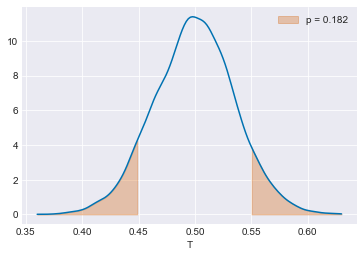

In [11]:
dist_muestreo = []
for _ in range(10000):
    monedas_sim = np.random.choice([0, 1], size=n)
    caras_sim = np.sum(monedas_sim)
    T = caras_sim / n
    dist_muestreo.append(T)
y = np.array(dist_muestreo)

T_obs = caras_obs / n
valor_p = np.sum(y[y <= T_obs]) / np.sum(y) + np.sum(y[y >= 1-T_obs]) / np.sum(y)

kde = stats.gaussian_kde(y)
x = np.linspace(min(y), max(y), 150)
density = kde.pdf(x)

plt.plot(x, density)

plt.fill_between(x[x <= T_obs], density[x <= T_obs],
                 alpha=0.3, color='C2',
                 label='p = {:.3f}'.format(valor_p))
plt.fill_between(x[x >= 1-T_obs], density[x >= 1-T_obs],
                 alpha=0.3, color='C2')

plt.legend()
plt.xlabel('T');

#### Interpretando los resultados

Recapitulemos; lo que acabamos de hacer es calcular la probabilidad de obtener fracciones de  caras respecto del total de las tiradas (curva azul), este número va entre 0 (ninguna cara observada en las 200 tiradas) y 1 (100% de caras en las 200 tiradas). Esta curva azul se llama _distribución de muestreo (sampling distribution)_. Y es la distribución de nuestro _estadístico_ $T$ para una muestra finita de $n=200$. 

Esta distribución es central en estadística frecuentista. De hecho a partir de ella hemos calculado el _valor p_, la suma de las dos áreas naranja en las colas de la curva azul. ¿Por qué tenemos dos colas? 

Esto deriva de la pregunta que estamos intentando contestar: "Son nuestros datos compatibles con una moneda no sesgada, es decir con una moneda que cae la mitad de las veces cara y la mitad ceca". Dado que es posible obtener una moneda sesgada "para un lado (las caras) o para el otro (las cecas)" el _valor p_ tiene en cuenta ambos casos. Esto se llama prueba de _dos colas_, si hubiéramos argumentado que solo nos interesa un caso sería una prueba de _una cola_. Ambos análisis son totalmente válidos, cual usar depende la pregunta a contestar


¿Cómo se interpreta el _valor p_? 

Bueno, desde el punto de vista frecuentista las probabilidades viven en _asintópia_ un mundo donde las probabilidades son frecuencias que se obtienen en el límite de infinitas repeticiones de un mismo experimento. Entonces la interpretación sería:

 > Si arrojáramos 200 veces al aire una moneda NO SESGADA y esto lo repetimos infinitas veces entonces el ~9 % de las veces obtendremos un sesgo al menos tan grande como el observado para caras. Y el ~18% obtendremos un resultado al menos tan sesgado como el observado tanto para caras como para cecas.

Es decir hemos encontrado la respuesta al pregunta ¿Cuán _esperable_ es este resultado para una moneda que cae la mitad de las veces cara?

Otra pregunta _natural_ sería ¿Es realmente _diferente_ este resultado de $H_{0}$? Para dar respuesta a esta pregunta se suele usar el concepto (o "confupto" es decir concepto muy confuso) de significancia estadística, que consiste, como ya adelantamos, en comparar el _valor p_ con el valor predeterminado $\alpha$:

* Si p < 0.05, entonces la diferencia es estadísticamente significativa
* Si p < 0.001, entonces la diferencia es estadísticamente muy-significativa

En este caso como p > 0.05 diríamos: "Se falla en rechazar la hipótesis nula con un $p \simeq 0.18$ y un nivel de significancia de 0.05".

¿De donde salen estos valores predeterminados? 

La verdad, de una confusión histórico-didáctica que llevó a la fusión de dos métodos "rivales" de inferencia, junto con un accidente histórico que dejo cuasi-congelado el valor de $\alpha$ en 0.05. Fuera de ese detalle, la intención de fijar un valor de $\alpha = 0.05$ (o cualquier otro) es la de controlar el nivel de errores de tipo I. Es decir las falsas alarmas o más formalmente controlar la cantidad de veces que estamos dispuestos a rechazar una hipótesis nula verdadera (es decir una que NO deberíamos haber rechazado). Lamentablemente se ha vuelto muy común que estos límites se utilicen para definir si un resultado deber ser publicado. El límite entonces los fija un criterio editorial (auto-impuesto por los propios científicos) que dependerá de la revista/disciplina, siendo 0.05 común por ej en psicología y en varias ramas de la biología.

#### Valores p analíticos

Los _valores p_, para este problema, pueden ser calculados de forma analítica, basta aplicar la distribución binomial.

¿Por qué esta distribución?

Precisamente por que modela eventos que tienen dos posibles resultados, cara-ceca, si-no, apagado-prendido, sano-enfermo, etc. La distribución binomial la vimos en el capítulo anterior y tiene la siguiente forma:  

$$p(x|n,p) = {\binom {n}{k}}p^x(1-p)^{n-x}$$


Hay que tener cuidado que $p$ en la distribución binomial NO es el _valor p_ del que estábamos hablando! Si no un parámetro de esta distribución. Este es un buen momento para  volver al capítulo anterior y revisar _como es_ esta distribución.

Según el paradigma frecuentista el procedimiento sería:

1. Vamos a asumir que la moneda tiene la misma posibilidad de caer cara (1) o ceca (0), p = 0.5
2. Vamos a lanzar una moneda 200 veces (igual cantidad que en nuestros datos)
3. Dados los puntos 1 y 2 y asumiendo que la moneda sigue una distribución binomial (con n=200, p =0.5) vamos a calcular la probabilidad de obtener 90 o menos caras (y luego multiplicar por dos). Esto es el _valor p_.

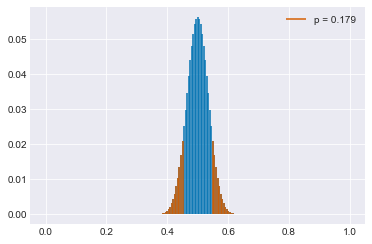

In [13]:
p = 0.5

dist_monedas = stats.binom(n, p);
x = np.arange(0, n + 1)
y = dist_monedas.pmf(x)
valor_p = dist_monedas.cdf(90) * 2 # por simetría

T = x/n
T_obs = caras_obs/n

valor_p = np.sum(y[T <= T_obs]) * 2
plt.vlines(T, 0, y, 'C0')
plt.vlines(T[T <= T_obs], 0, y[T <= T_obs], 'C2',
           label='p = {:.3f}'.format(valor_p))
plt.vlines(T[T >= 1-T_obs], 0, y[T >= 1-T_obs], 'C2')

plt.legend();

#### Problemas con las prueba de hipótesis

Esta aproximación tiene varios problemas

1. Impone una forma de pensar dicotómica, que suele ser inapropiada en la mayoría de los estudios científicos.
2. Los *valor p* omiten muchos factores, información previa, nivel de precisión/incerteza de la estimación.
3. Un efecto estadísticamente significativo no tiene por que ser un efecto relevante.
4. Los _valores p_ dependen de las intenciones del observador! Si el experimento A es tirar $N$ veces una moneda y contar el número de caras y el experimento B es tirar una moneda hasta que obtener $z$ caras. El _valor p_ no necesariamente es el mismo aún si en ambos experimentos observamos que $N=10, z=7$). La razón es que las _distribuciones de muestro_ son diferentes en ambos casos, aún cuando los datos sean idénticos.
5. En general los *valores p* son interpretados erroneamente. Un trabajo mostró que solo el 62% de los encuestados fue capaz de contestar de forma correcta sobre la definición de los *valores p*. Lo interesante es que en realidad ninguna de las respuestas provistas en este estudio correspondía a una definición correcta de los _valores p_! Los *valores p* NO son:

    * La probabilidad de que $H_{0}$ sea cierta
    * La probabilidad de que $\neg H_{0}$ falsa
    * La probabilidad de cometer un error al rechazar $H_{0}$
    * La probabilidad de que los datos observados se hayan dado por *azar*
    * Una forma de indicar que NO hay efecto si p > 0.5 (o el nivel que sea)
    * Una medida de la *relevancia* de un efecto.

Gran parte de los problemas derivados de los *valores p*, provienen de usarlos como parte de la maquinaria de "prueba de hipótesis nula". La otra parte del problema de usar los _valores p_ proviene quizá de que estos no derivan de un sistema formal de cálculo de probabilidades si no que fueron introducidos de forma totalmente _ad hoc_. Como veremos más adelante la Estadística Bayesiana provee de algo llamado factores de Bayes que curiosamente es todo lo que usted siempre quiso que un _valor p_ fuera, pero que el _valor p_ NO puede ser.

Una forma de usar los _valores p_ sin meter la pata es no pedirle que ofrezcan la información que no pueden ofrecer. Un _valor p_ debería ser usado con el fin que originalmente se postuló: Una forma aproximada, cuando se cuenta con poca información sobre un problema, para intentar estimar (de forma objetiva) si vale la pena seguir mirando los datos o haciendo experimentos a fin de replicar o extender resultados. Entonces en general valores "bajos" de los _valores p_ indicarían que es posible que tengamos algo interesante. Por ejemplo algunos autores recomiendan de forma _muuuy_ general interpretar los _valores p_ de la siguiente manera 

* p < 0.01 Hey parece que tenemos algo! :-)
* p > 0.1 humm al parecer no hay mucho que decir :-(
* 0.01 < p < 0.1 La vida rara vez nos ofrece respuestas claras! :-|

## Estimaciones puntuales e incerteza

En vez de poner a prueba hipótesis una alternativa es realizar inferencias sobre parámetros de un modelo estadístico. Estás estimaciones suelen incluir dos partes:

* Estimaciones puntuales
* Estimación de la incerteza asociada a la estimación puntual

### Estimación por máxima verosimilitud

Ahora veamos una alternativa a los valores *valores p* y la idea de la prueba de hipótesis, llamada estimación de máxima verosimilitud, o en inglés maximum likelihood estimation (MLE).

Para entender este método continuemos con el ejemplo de la moneda. Como dijimos podemos modelar este problema usando la distribución binomial. cuando $n=1$ la distribución binomial se convierte en la distribución de Bernoulli, la cual podemos escribir como:

$$f(x | p) = p^x(1-p)^{1-x}$$

donde como ya vimos $x \in [0,1]$.

Dado un conjunto de observaciones $x_1, x_2 ... x_n$, las cuales son indepentietes entre si (como las tiradas de una moneda) tendremos que es posible escribir: 

$$f(x_1, x_2 ... x_n | p) = p^x_1(1-p)^{1-x_1} p^x_2(1-p)^{1-x_2} ... p^x_n(1-p)^{1-x_n}$$

Esto que acabamos de escribir es el _likelihood_ (de nuestro modelo) el cual se puede escribir de forma más sintética como:

$$\mathcal{L}(p; x_1, x_2 ... x_n) = \prod_{i=1}^n p^x_i(1-p)^{1-x_i}$$

¿Cómo nos ayuda esta expresión a resolver nuestro problema? Bueno lo primero que hay que notar, y que he omitido hasta este momento, es que desconocemos el valor de $p$, de hecho esto es lo que queremos estimar. Lo cual se resuelve como un problema de optimización, queremos encontrar el valor de $p$ que maximiza el _likelihood_ (de ahí el nombre del método). Analíticamente esto se resulve haciendo

$$\frac{\partial \mathcal{L}}{\partial p} = 0$$

Es común usar el símbolo $\hat{}$ para indicar el valor del parámetro que maximiza el _likelihood_ en nuestro caso sería $\hat p$, o alternativamente $p_{mle}$ (o incluso ambas notaciones en simultaneo).

En la práctica se suele usar el logaritmo del likelihood (log-likelihood), esto facilita los cálculos matemáticos, por ejemplo el producto se convierte en una suma. Esto también provee de ventajas numéricas, básicamente previene el _underflow_ que podría ocurrir al multiplicar sucesivas veces probabilidades (números entre 0 y 1).

Resulta que para nuestro modelo, el valor de $p$ que maximiza el likelihood es:

$$\hat p = \bar x$$

donde $\bar x = \frac{1}{n}\sum_i^n x$, es decir la media. Que siguiendo nuestra convención de llamar 0 a las cecas y 1 a las caras es también el número de caras dividido el número total de tiradas.

Por lo tanto para nuestro problema $\hat p$:

In [5]:
caras_obs / n

0.45

Una forma de corroborar que este es el valor de $p$ que maximiza al _likelihood_ (o _log-likelihood_) es usar el método de la grilla. Este método consiste simplemente en evaluar una función en varios puntos de una grilla (en general equidistantes). 
Entonces lo que vamos a hacer es dibujar el valor del _log-likelihood_ para varios valores de $p$, en todo el rango posible de valores de $p$.

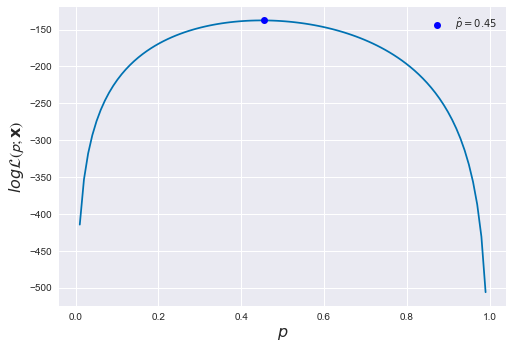

In [6]:
p = np.linspace(0, 1, 100)[1:-1]
ls = []
for i in p:
    dist = stats.binom(n=1, p=i)
    l = np.sum(dist.logpmf(monedas_obs))
    ls.append(l)

plt.plot(p, ls)
p_hat = p[np.argmax(ls)]
plt.plot(p[np.argmax(ls)], np.max(ls), 'bo',
         label='$\hat p ={:.2f}$'.format(p_hat))

plt.ylabel('$log\mathcal{L(p;\mathbf{x})}$', fontsize=16)
plt.xlabel('$p$', fontsize=16)
plt.legend();


### Intervalos de confianza

$\hat p$ es un ejemplo de estimación puntual, un número que usamos como estimación de un parámetro de una población. En este caso particular la media de la muestra como aproximación de la media de la población.

Suele ser buena idea acompañar la estimación puntual con una medida de la incertidumbre asociada a esa estimación. Una forma de medir esta incerteza es calculando lo que se conoce como **intervalo de confianza**. 

Este intervalo se puede construir a partir de la distribución de muestreo. A medida que $n$ aumenta el teorema del límite central garantiza que dada una población con media finita $\mu$ y varianza finita (y distinta de cero) $\sigma^2$: 

$$\hat \mu \sim \mathcal{N} \left(\mu, \frac{\sigma^2}{n}\right)$$

Entonces podemos definir un intervalo de confianza en términos de la estimación puntual y el error estándar (SE) de esa media:

$$IC = [\hat p - SE, \hat p + SE]$$

Este sería un intervalo de confianza de $\pm 1 SE$, si quisiéramos ampliar o achica el rango podría usar $X$ errores estándar, por ejemplo:

$$IC = [\hat p - X SE, \hat p + X SE]$$

En la práctica es común que la gente defina los $IC$ en términos de porcentajes y no $SE$, de hecho el porcentaje más comúnmente usado es 95%. Convertir entre porcentajes y $SE$ es simple si asumimos que la distribución es Gaussiana. En ese caso es conocido que un intervalo del 95% estará de forma proximidad dentro de 1.96 errores estándar (o lo que es lo mismo un Z-score de 1.96).

Podemos usar el siguiente código para pasar de porcentajes a _cantidades_ de $SE$

In [7]:
def IC_to_a(ic=95):
    a = (100 - ic) / 100
    gaussian = stats.norm(0, 1)
    l, u = gaussian.ppf([(a / 2), (1 - a / 2)])
    x = np.linspace(-4, 4, 300)
    y = gaussian.pdf(x)
    plt.plot(x, y);
    plt.fill_between(x[x < l], y[x < l], alpha=0.5, color='C2')
    plt.fill_between(x[x > u], y[x > u], alpha=0.5, color='C2',
                    label='$\\alpha$ = {:.3f}'.format(a))

    plt.vlines([l, u], 0, gaussian.pdf([l,u]),
              label='{:.3f} {:.3f}'.format(l, u))

    plt.legend(fontsize=14)
    plt.show()

In [8]:
interact(IC_to_a, ic=(0, 100, 5));

Widget Javascript not detected.  It may not be installed or enabled properly.


Dada la definición de $IC$ y el hecho que usando $\pm 1.96$ errores estándard podemos definir un intervalo de confianza del 95%, usemos Python para calcularlo.

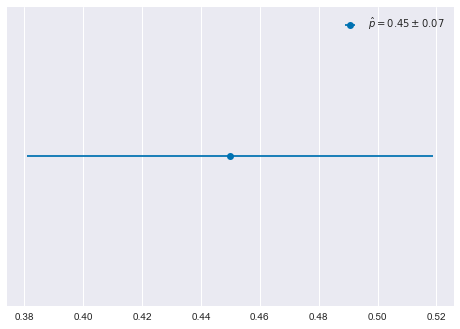

In [9]:
p_hat = caras_obs/n
dist_monedas = stats.binom(n=1, p=p_hat)
std_error =  dist_monedas.std() / n**0.5
r = std_error * 1.96  

plt.errorbar(x=p_hat, y=0,
             xerr=r,
             fmt='o',
            label='$\hat p = {:.2f} \pm {:.2f}$'.format(p_hat, r))
plt.yticks([])
plt.legend();

Como ya dijimos es muy común usar un intervalo con un *nivel de confianza* del 95%. Pero este valor es arbitrario, tan arbitrario como el valor de $\alpha$ en las pruebas de hipótesis. De hecho ambos valores están relacionados.

Esencialmente un intervalo de confianza contiene a todos los valores de $\hat p$ para los cuales $H_0$ NO sería rechazada, para un dado valor de $\alpha$. Los intervalos de confianza se suelen expresar como $(1 - \alpha) 100 %$, por lo que un valor de $\alpha=0.05$ se relaciona con un intervalo de confianza de 95%.

Como sucede con los _valores p_ resulta que es fácil interpretar los $IC$ de forma errónea. Por ello veamos cual es la interpretación adecuada.

Si repetimos un experimento (infinitas veces) y cada vez calculamos un intervalo de confianza, entonces obtendremos que el X% de esos intervalos contendrán el valor _real_ del parámetro de interés.
Es decir el nivel de confianza, digamos el 95%, NO es sobre un intervalo en particular es sobre todo el universo posible de intervalos que se podrían calcular con muestras similares a la nuestra. Por lo tanto NO es posible decir que tenemos una confianza del 95% que NUESTRO intervalo contenga el parámetro, en sentido estricto nuestro intervalo o contiene o no contiene al parámetro _real_. Si quisiéramos hacer enunciados como tengo un 95% de confianza que el parámetro real se encuentra en tal o cual rango, deberé hacer uso de estadística Bayesiana!

### Bootstrapping

EL bootstrapping es una técnica computacional que permite aproximar la _distribución de muestreo_. Su principal ventaja es su simplicidad lo que permite usarla con estimadores sencillos como el que hemos usado hasta ahora y también con estimadores más complejos. Esta técnica es parte de una familia más grande de métodos que usualmente se conocen como métodos de _remuestreo_.

La idea del bootstrapping consiste en generar un número _grande_ de muestras a partir de (re)muestrear los propios datos! El muestreo se hace con reemplazo:

1. _saco_ un elemento de los datos
2.  _anoto_ su valor
3. lo _vuelvo a poner_ con el resto de los datos
4. repito de 1 a 3 hasta obtener una (re)muestra del mismo tamaño que la muestra original
5. a partir de esa (re)muestra calculo lo que sea que me interese (la media, la desviación estándar, etc)
6. repito miles de veces los pasos 4 y 5

De esta forma habré logrado calcular miles de veces el estimador de interés por lo que no solo tendré una estimación puntual, si no una distribución de valores para el estimador. Usando Python se puede escribir de forma más breve incluso que usando español ;-)

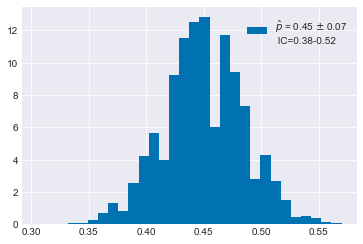

In [17]:
p_hats = []
for _ in range(10000):
    muestra = np.random.choice(monedas_obs, replace=True, size=len(monedas_obs))
    p_hats.append(np.mean(muestra))
p_hats = np.array(p_hats)
p_hat = np.mean(p_hats)
sd = np.std(p_hats) * 2
IC = p_hat - sd, p_hat + sd
plt.hist(p_hats, bins=30, normed=True,
         label='$\hat p$ = {:.2f} $\pm$ {:.2f} \n IC={:.2f}-{:.2f}'.format(p_hat, sd,  *IC))
#sns.kdeplot(p_hats,label='$\hat p$ = {:.2f} $\pm$ {:.2f} \n IC={:.2f}-{:.2f}'.format(p_hat, sd,  *IC))
plt.legend();

"Bootstraps" son las tiras que tienen muchas botas cuyo propósito es facilitar el colocárselas. Bootstrapping hace referencia a una expresión del inglés que quiere decir algo así como _levantarse uno mismo tirando de las tiras de las propias botas_, en definitiva algo imposible o que no tiene sentido. Saber el origen del término no ayuda a disipar la impresión que el bootstrapping parece ser un procedimiento tramposa, quizá hasta incorrecto.

De todas formas existen justificaciones teóricas para este procedimiento que garantizan, que bajo ciertas condiciones, las aproximaciones son buenas. Además de justificaciones empíricas que han mostrado la utilidad de este método.

Existen múltiples variantes de este idea general, la que hemos presentado se llama bootstap no-paramétrico. En estadística frecuentista _no-paramétrico_ quiere decir básicamente que el método NO asume una distribución para lo datos. Fijensé que no asumimos que los datos seguían una distribución binomial (ninguna otra). Algunas de las variantes de bootstrapping son:

* Bootstrapping paramétrico, a partir de un distribución (por ej la distribución binomial) se obtiene un estimador puntual (por ej usando Maximun Likelihood) y se usa esa distribución para generar muestras aleatorias (en vez de muestrear de los datos).

* Bootstrapping suavizado, lo que se hace es agregar un pequeña cantidad de ruido (generalmente Gaussiano). Esto puede ayudar a "llenar" a cada dato de esta forma se obtiene una distribución de muestreo que es más suave. En cierta forma equivale a muestrear no de los datos si no de la _Kernel density estimation_ de los datos. Además este método se puede considerar como un intermedio entre el bootstrapping no-paramétrico y el paramétrico.

* Bootstrapping de a bloques, se usa con datos correlacionados por ejemplo series temporales en la que un simple bootstrapping destruiría la correlación existente en los datos.

En general se enseña al bootstrapping como un _procedimiento_ o _método_ que no asume nada sobre los datos, mas o menos como hemos hecho hasta ahora. Una alternativa sería mostrar que el bootstrapping es en realidad un modelo estadístico que asume ciertas cosas, de hecho se puede mostrar que es un caso especial de [modelo Bayesiano](http://www.sumsar.net/blog/2015/04/the-non-parametric-bootstrap-as-a-bayesian-model/). De hecho el creador del Bootstrapping se refiere al mismo como un "poor's man Bayesian method", algo así como la versión "trucha/berreta" de un método Bayesiano. Este método en realidad asume que:

* Los datos son discretos
* Los datos pueden tomar valores entre $-\infty$ e $\infty$

Aún cuando casi ningún conjunto de datos satisface estos dos criterios en la práctica el método/modelo de bootstrapping suele ser una buena aproximación siempre y cuando se cumplan condiciones como:

* El tamaño de la muestra no sea demasiado pequeño
* Los datos muestreados _cubran_ más menos el rango _real_ de la población
* La muestra no esté sesgada.

Es decir criterios que uno espera, que en general, tenga la mayoría de las muestras con las que uno querría trabajar.

* Mostrar como usar bootstrtaping con la regresión lineal?
* Mostrar minimos cuadrados como caso particular de MLE?

## Ejercicios

1. graficar dist_monedas.cdf() en el rango de 0 a 20. Luego lo mismo pero para un n más grande  por ejmplo 1000
2. Modificar el ejemplo de bootstraping para eliminar el loop y la necesidad de juntar los datos en una lista. Ayuda _size_ puede ser una tupla.
3. A partir del ejemplo de bootstaping implementá una versión "suavizada" y una paramétrica.
4. Si la distribución de muestreo es simétrica, entonces basta con calcular el _valor p_ para un caso y multiplicar por 2. Comprobar que esto es cierto